### 필수과제 1
- from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
- 스케일링 진행하지 않은 2개 + 추가로 더 하셔도 됩니다 abs, 등으로 차이를 비교해주세요!

### 수업시간 데이터 가져오기, 전처리
- 4/2 수업시간에 진행한 전처리, 선택한 컬럼을 그대로 가져와서 진행

In [1]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv("wine_test.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class'],
      dtype='object')

In [4]:
df = df[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class']]

In [5]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [6]:
df.isna().sum()

alcohol                         2
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            5
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df_sp_1 = df[["alcohol", "ash", "nonflavanoid_phenols", "proanthocyanins"]]

In [9]:
df_sp_1

,alcohol,ash,nonflavanoid_phenols,proanthocyanins
0,14.23,2.43,0.28,2.29
2,13.16,2.67,0.30,2.81
3,14.37,2.50,0.24,2.18
4,13.24,2.87,0.39,1.82
5,14.20,2.45,0.34,1.97
...,...,...,...,...
173,13.71,2.45,0.52,1.06
174,13.40,2.48,0.43,1.41
175,13.27,2.26,0.43,1.35
176,13.17,2.37,0.53,1.46


In [10]:
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, random_state=111)

In [11]:
kmeans.fit(df_sp_1)

KMeans(n_clusters=3, random_state=111)

### StandardScaler (수업시간에 진행)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
st_scaler = StandardScaler()

In [14]:
st_scaler.fit(df_sp_1)

StandardScaler()

In [15]:
df_sp_1_st = st_scaler.transform(df_sp_1)

In [16]:
df_new1 = pd.DataFrame(df_sp_1_st, columns=df_sp_1.columns)

In [17]:
df_new1

,alcohol,ash,nonflavanoid_phenols,proanthocyanins
0,1.526314,0.207821,-0.661032,1.250922
1,0.181214,1.080798,-0.502496,2.170422
2,1.702309,0.462439,-0.978105,1.056412
3,0.281782,1.808278,0.210918,0.419835
4,1.488601,0.280569,-0.185423,0.685075
...,...,...,...,...
166,0.872621,0.280569,1.241406,-0.924050
167,0.482919,0.389691,0.527991,-0.305156
168,0.319495,-0.410537,0.527991,-0.411252
169,0.193785,-0.010423,1.320674,-0.216742


### MinMaxScaler

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
mm_scaler = MinMaxScaler()

In [20]:
mm_scaler.fit(df_sp_1)

MinMaxScaler()

In [21]:
df_sp_1_mm = mm_scaler.transform(df_sp_1)

In [22]:
df_new2 = pd.DataFrame(df_sp_1_mm, columns=df_sp_1.columns)

In [23]:
df_new2 # MinMaxScaler를 사용해서 조정된 데이터

,alcohol,ash,nonflavanoid_phenols,proanthocyanins
0,0.860215,0.572193,0.283019,0.593060
1,0.572581,0.700535,0.320755,0.757098
2,0.897849,0.609626,0.207547,0.558360
3,0.594086,0.807487,0.490566,0.444795
4,0.852151,0.582888,0.396226,0.492114
...,...,...,...,...
166,0.720430,0.582888,0.735849,0.205047
167,0.637097,0.598930,0.566038,0.315457
168,0.602151,0.481283,0.566038,0.296530
169,0.575269,0.540107,0.754717,0.331230


### RobustScaler

In [24]:
from sklearn.preprocessing import RobustScaler

In [25]:
rb_scaler = RobustScaler()

In [26]:
rb_scaler.fit(df_sp_1)

RobustScaler()

In [27]:
df_sp_1_rb = rb_scaler.transform(df_sp_1)

In [28]:
df_new3 = pd.DataFrame(df_sp_1_rb, columns=df_sp_1.columns)

In [29]:
df_new3 # RobustScaler를 사용해서 조정된 데이터

,alcohol,ash,nonflavanoid_phenols,proanthocyanins
0,0.897338,0.205882,-0.324324,1.013889
1,0.083650,0.911765,-0.216216,1.736111
2,1.003802,0.411765,-0.540541,0.861111
3,0.144487,1.500000,0.270270,0.361111
4,0.874525,0.264706,0.000000,0.569444
...,...,...,...,...
166,0.501901,0.264706,0.972973,-0.694444
167,0.266160,0.352941,0.486486,-0.208333
168,0.167300,-0.294118,0.486486,-0.291667
169,0.091255,0.029412,1.027027,-0.138889


### 스케일링 비교

In [30]:
df_new1.describe() # 데이터의 summary 통계량 (StandardScaler)

,alcohol,ash,nonflavanoid_phenols,proanthocyanins
count,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02
mean,5.194026e-17,-2.467162e-16,-1.727014e-16,4.544773e-18
std,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00
min,-2.496415e+00,-3.684199e+00,-1.850056e+00,-2.073426e+00
25%,-8.118974e-01,-5.196592e-01,-7.799346e-01,-6.234444e-01
50%,4.293264e-02,-4.679698e-02,-1.854228e-01,-3.991534e-02
75%,8.411931e-01,7.170573e-01,6.865279e-01,6.497100e-01
max,2.180008e+00,3.117742e+00,2.351161e+00,3.531990e+00


In [31]:
df_new2.describe() # 데이터의 summary 통계량 (MinMaxScaler)

,alcohol,ash,nonflavanoid_phenols,proanthocyanins
count,171.000000,171.000000,171.000000,171.000000
mean,0.533830,0.541639,0.440362,0.369897
std,0.214467,0.147449,0.238725,0.178923
min,0.000000,0.000000,0.000000,0.000000
25%,0.360215,0.465241,0.254717,0.258675
50%,0.543011,0.534759,0.396226,0.362776
75%,0.713710,0.647059,0.603774,0.485804
max,1.000000,1.000000,1.000000,1.000000


In [32]:
df_new3.describe() # 데이터의 summary 통계량 (RobustScaler)

,alcohol,ash,nonflavanoid_phenols,proanthocyanins
count,171.000000,171.000000,171.000000,171.000000
mean,-0.025971,0.037840,0.126442,0.031352
std,0.606704,0.810967,0.683916,0.787757
min,-1.536122,-2.941176,-1.135135,-1.597222
25%,-0.517110,-0.382353,-0.405405,-0.458333
50%,0.000000,0.000000,0.000000,0.000000
75%,0.482890,0.617647,0.594595,0.541667
max,1.292776,2.558824,1.729730,2.805556


> #### StandardScaler
> - 표준화
> - 데이터들의 평균이 0, 분산(+표준편차)이 1인 값으로 변환
> - 원 데이터가 정규분포를 따르면 이를 표준정규본포로 변환한 것
> - 공식은 다음과 같다:
$$ x_{new}=\frac{x-\mu}{\sigma} $$

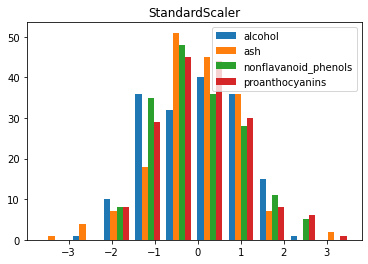

In [34]:
# StandardScaler 시각화
plt.title("StandardScaler")
plt.hist(df_new1)
plt.legend(df_new1.columns)

> #### MinMaxScaler
> - 정규화
> - 데이터 값 범위를 0~1 사이로 변환
> - 최댓값과 최솟값을 기준으로 데이터를 스케일링함
> - 공식은 다음과 같다:


$$ x_{new}=\frac{x_{i}-x_{min}}{x_{max}-x_{min}} $$

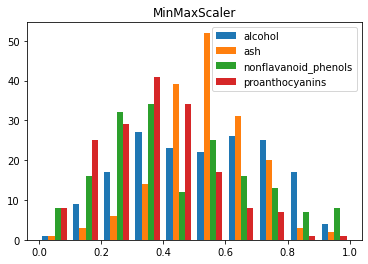

In [35]:
# MinMaxScaler 시각화
plt.title("MinMaxScaler")
plt.hist(df_new2)
plt.legend(df_new2.columns)

> #### RobustScaler
> - 평균과 분산 대신, 중간값과 사분위값을 조정
> - 이상치의 영향을 최소화한다는 장점이 있음
> - MinMaxScaler와 유사한 공식을 갖지만, 사분위값을 사용한다는 차이가 있다.
> - 공식은 다음과 같다:
$$ x_{new}=\frac{x_i-x_{Q_2}}{x_{Q_3}-x_{Q_1}} $$
> - Q1: 상위 25% 값
> - Q2(중간값): 상위 50% 값
> - Q3: 상위 75% 값

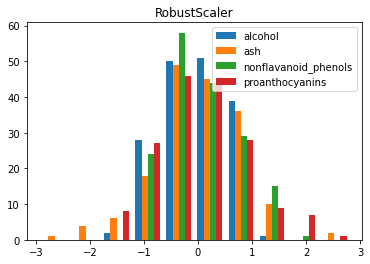

In [36]:
# RobustScaler 시각화
plt.title("RobustScaler")
plt.hist(df_new3)
plt.legend(df_new3.columns)